In [2]:
%%capture
import pandas as pd
import csv
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ProjetHSB/doses_volumes_patients_final_update_110123.csv",
                 sep = ",", low_memory = False)
labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ProjetHSB/labels.csv", sep = ",", low_memory = False)

Mounted at /content/drive


In [4]:
df = df.drop('card_age_x', axis = 1)

df = df.drop('Pathologie_cardiaque_3_new_y', axis = 1)

In [5]:
df.rename(columns={'Pathologie_cardiaque_3_new_y': 'Pathologie_cardiaque_3', 'card_age_y': 'card_age'}, inplace=True)


In [6]:
df.head()

,ctr,numcent,dv_V01_1320,dv_V05_1320,dv_V1_1320,dv_V2_1320,dv_V5_1320,dv_V10_1320,dv_V15_1320,dv_V20_1320,...,dv_D95_324,dv_D99_324,Pathologie_cardiaque_3_new_x,card_age,do_ALKYL,do_ANTHRA,do_VINCA,ANTHRA,ALKYL,VINCA
0,3,197204357,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000,0.00000,0,47.554707,0.000000,0.000000,0.000000,0,0,0
1,3,197608259,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.037,0.03600,1,20.545254,98731.021583,575.179856,27.431655,1,1,1
2,3,197704050,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000,0.00000,0,42.681232,0.000000,0.000000,0.000000,0,0,0
3,3,197704181,100.0,44.532788,12.736392,0.000000,0.000000,0.0,0.0,0.0,...,0.232,0.22100,0,42.818128,4924.440694,270.202507,60.120058,1,1,1
4,3,197704641,100.0,100.000000,94.521714,22.741981,0.017031,0.0,0.0,0.0,...,0.988,0.93878,0,42.662067,0.000000,0.000000,0.000000,0,0,0


In [7]:
len(df)

3943

In [8]:
labels.head()

,Unnamed: 0.1,Unnamed: 0,ctr,numcent,file_location,file_name,Pathologie_cardiaque_3_new,do_ANTHRA,do_ALKYL,do_VINCA,...,train,test,card_age_40,train_40,val_40,test_40,card_age_50,train_50,val_50,test_50
0,0,0,3,199600389,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_199600389_ID2013A.nii.gz,0,250.000000,0.000000,18.000000,...,0.0,1.0,0,0,0,0,0,0,0,0
1,1,1,3,198107395,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_198107395_ID2013A.nii.gz,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,0,0
2,2,2,3,199904912,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_199904912_ID2013A.nii.gz,0,360.000000,11400.000000,45.000000,...,0.0,1.0,0,0,0,0,0,0,0,0
3,3,3,3,199807137,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_199807137_ID2013A.nii.gz,0,240.000000,13000.000000,21.000000,...,0.0,1.0,0,0,0,0,0,0,0,0
4,4,4,3,198301868,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_198301868_ID2013A.nii.gz,0,353.684211,6602.105263,29.473684,...,0.0,1.0,0,0,0,0,0,0,0,0


In [9]:
labels.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ctr', 'numcent', 'file_location',
       'file_name', 'Pathologie_cardiaque_3_new', 'do_ANTHRA', 'do_ALKYL',
       'do_VINCA', 'card_age', 'train', 'test', 'card_age_40', 'train_40',
       'val_40', 'test_40', 'card_age_50', 'train_50', 'val_50', 'test_50'],
      dtype='object')

In [10]:
labels = labels.drop('ctr', axis = 1)
labels = labels.drop('card_age', axis = 1)
labels = labels.drop('do_ANTHRA', axis = 1)
labels = labels.drop('do_ALKYL', axis = 1)
labels = labels.drop('do_VINCA', axis = 1)
labels = labels.drop('Pathologie_cardiaque_3_new', axis = 1)
labels = labels.drop('Unnamed: 0.1', axis = 1)
labels = labels.drop('Unnamed: 0', axis = 1)


In [11]:
big_df = pd.merge(labels, df, 
                   on='numcent', 
                   how='outer')

In [12]:
big_df.head()

,numcent,file_location,file_name,train,test,card_age_40,train_40,val_40,test_40,card_age_50,...,dv_D95_324,dv_D99_324,Pathologie_cardiaque_3_new_x,card_age,do_ALKYL,do_ANTHRA,do_VINCA,ANTHRA,ALKYL,VINCA
0,199600389,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_199600389_ID2013A.nii.gz,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.223310,0.193610,0,24.085368,0.000000,250.000000,18.000000,1,0,1
1,198107395,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_198107395_ID2013A.nii.gz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0,38.390932,0.000000,0.000000,0.000000,0,0,0
2,199904912,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_199904912_ID2013A.nii.gz,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.256510,0.250118,0,20.523351,11400.000000,360.000000,45.000000,1,1,1
3,199807137,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_199807137_ID2013A.nii.gz,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8.654008,6.566186,0,21.172235,13000.000000,240.000000,21.000000,1,1,1
4,198301868,D:\data\dose_matrices\nii\heart_cropped\CURIE\...,newdosi_3_198301868_ID2013A.nii.gz,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.355000,0.323000,0,36.934366,6602.105263,353.684211,29.473684,1,1,1


In [13]:
col_name = big_df.columns

In [14]:
col_name

Index(['numcent', 'file_location', 'file_name', 'train', 'test', 'card_age_40',
       'train_40', 'val_40', 'test_40', 'card_age_50',
       ...
       'dv_D95_324', 'dv_D99_324', 'Pathologie_cardiaque_3_new_x', 'card_age',
       'do_ALKYL', 'do_ANTHRA', 'do_VINCA', 'ANTHRA', 'ALKYL', 'VINCA'],
      dtype='object', length=166)

# Construction des datasets

In [15]:
big_df.replace("NaN", np.nan)
print(len(big_df))
big_df = big_df.dropna()
print(len(big_df))
big_df.isna().sum().sum()

3953
3949


0

### Modèles avec card age 50

In [16]:
df_50_train = big_df[big_df.train_50 == 1]
df_50_val = big_df[big_df.val_50 == 1]
df_50_test = big_df[big_df.test_50 == 1]

In [17]:
len(df_50_train), len(df_50_val), len(df_50_test)

(347, 116, 116)

In [18]:
y_train_50 = df_50_train['Pathologie_cardiaque_3_new_x']
X_train_50 = df_50_train.loc[:,df_50_train.columns[14:len(df_50_train.columns)-3]]
X_train_50 = X_train_50.drop('Pathologie_cardiaque_3_new_x', axis = 1)
X_train_50 = X_train_50.drop('card_age', axis = 1)

X_train_50.head()

,dv_V01_1320,dv_V05_1320,dv_V1_1320,dv_V2_1320,dv_V5_1320,dv_V10_1320,dv_V15_1320,dv_V20_1320,dv_V25_1320,dv_V30_1320,...,dv_D50_324,dv_D60_324,dv_D70_324,dv_D80_324,dv_D90_324,dv_D95_324,dv_D99_324,do_ALKYL,do_ANTHRA,do_VINCA
6,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.043000,0.042000,0.04100,0.039000,0.037000,0.037000,0.036000,98731.021583,575.179856,27.431655
44,100.00000,100.00000,100.00000,100.000000,100.000000,100.000000,17.626018,0.000000,0.000000,0.00000,...,13.626022,13.480734,13.30863,13.051758,12.893321,12.838761,12.786354,8400.000000,120.000000,3.000000
81,100.00000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,96.727199,91.67546,...,40.314000,39.835000,39.41000,38.235000,26.335000,24.705000,23.159000,4753.172589,0.000000,8.375635
263,98.52335,98.52335,98.52335,97.622792,95.710762,92.254209,87.796116,82.508650,0.000000,0.00000,...,20.061280,20.061280,19.94660,14.588870,7.738128,3.742488,0.000000,0.000000,175.888325,0.000000
403,100.00000,100.00000,100.00000,100.000000,100.000000,99.487275,92.582203,84.276426,79.944269,76.44622,...,32.344500,26.388600,20.56040,17.324000,14.571000,13.160450,10.861240,5202.903226,0.000000,8.193548


In [118]:
y_val_50 = df_50_val['Pathologie_cardiaque_3_new_x']
X_val_50 = df_50_val.loc[:,df_50_val.columns[14:len(df_50_val.columns)-3]]
X_val_50 = X_val_50.drop('Pathologie_cardiaque_3_new_x', axis = 1)
X_val_50 = X_val_50.drop('card_age', axis = 1)

X_val_50.head()

,dv_V01_1320,dv_V05_1320,dv_V1_1320,dv_V2_1320,dv_V5_1320,dv_V10_1320,dv_V15_1320,dv_V20_1320,dv_V25_1320,dv_V30_1320,...,dv_D50_324,dv_D60_324,dv_D70_324,dv_D80_324,dv_D90_324,dv_D95_324,dv_D99_324,do_ALKYL,do_ANTHRA,do_VINCA
151,100.0,100.000000,100.000000,74.381915,37.683025,16.675759,0.0,0.0,0.0,0.0,...,3.586,3.128,2.485,1.964,1.5830,1.326,1.094,22082.142857,392.571429,22.900000
697,100.0,100.000000,100.000000,89.738909,3.955084,0.000000,0.0,0.0,0.0,0.0,...,3.267,3.008,2.763,2.440,2.1500,1.967,1.837,0.000000,0.000000,0.000000
756,100.0,100.000000,98.946892,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.479,1.479,1.466,1.310,1.1615,1.051,0.957,6362.704918,0.000000,5.090164
766,100.0,100.000000,100.000000,87.563484,12.338355,0.230464,0.0,0.0,0.0,0.0,...,3.255,2.883,2.459,2.267,2.0460,1.832,1.652,0.000000,0.000000,27.147541
809,100.0,62.454887,33.947178,2.413429,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.903,0.807,0.705,0.580,0.4340,0.353,0.314,0.000000,0.000000,0.000000


In [119]:
y_val_50.value_counts()


0    60
1    56
Name: Pathologie_cardiaque_3_new_x, dtype: int64

In [30]:
y_test_50 = df_50_test['Pathologie_cardiaque_3_new_x']
X_test_50 = df_50_val.loc[:,df_50_val.columns[14:len(df_50_val.columns)-3]]
X_test_50 = X_test_50.drop('Pathologie_cardiaque_3_new_x', axis = 1)
X_test_50 = X_test_50.drop('card_age', axis = 1)

X_test_50.head()

,dv_V01_1320,dv_V05_1320,dv_V1_1320,dv_V2_1320,dv_V5_1320,dv_V10_1320,dv_V15_1320,dv_V20_1320,dv_V25_1320,dv_V30_1320,...,dv_D50_324,dv_D60_324,dv_D70_324,dv_D80_324,dv_D90_324,dv_D95_324,dv_D99_324,do_ALKYL,do_ANTHRA,do_VINCA
151,100.0,100.000000,100.000000,74.381915,37.683025,16.675759,0.0,0.0,0.0,0.0,...,3.586,3.128,2.485,1.964,1.5830,1.326,1.094,22082.142857,392.571429,22.900000
697,100.0,100.000000,100.000000,89.738909,3.955084,0.000000,0.0,0.0,0.0,0.0,...,3.267,3.008,2.763,2.440,2.1500,1.967,1.837,0.000000,0.000000,0.000000
756,100.0,100.000000,98.946892,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.479,1.479,1.466,1.310,1.1615,1.051,0.957,6362.704918,0.000000,5.090164
766,100.0,100.000000,100.000000,87.563484,12.338355,0.230464,0.0,0.0,0.0,0.0,...,3.255,2.883,2.459,2.267,2.0460,1.832,1.652,0.000000,0.000000,27.147541
809,100.0,62.454887,33.947178,2.413429,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.903,0.807,0.705,0.580,0.4340,0.353,0.314,0.000000,0.000000,0.000000


### Modèles avec card age = 40

#### Boostrap

In [31]:
df_40_train = big_df[big_df.train_40 == 1]
df_40_val = big_df[big_df.val_40 == 1]
df_40_test = big_df[big_df.test_40 == 1]

In [32]:
X_class0 = df_40_train[df_40_train.Pathologie_cardiaque_3_new_x == 0]
X_class1 = df_40_train[df_40_train.Pathologie_cardiaque_3_new_x == 1]

In [33]:
import numpy as np
from sklearn.utils import resample

# Supposons que nous avons un dataset X et des labels y
# X est une matrice de taille (n_samples, n_features)
# y est un vecteur de taille (n_samples,)

# Calculer le nombre d'échantillons dans chaque classe
n_samples_class0, n_samples_class1 = X_class0.shape[0], X_class1.shape[0]
print(n_samples_class1)

# Calculer le nombre d'échantillons à ajouter à la classe majoritaire
n_samples_to_add = int(n_samples_class1 *3)
print(n_samples_to_add)

# Générer des échantillons bootstrap de la classe minoritaire
X_class1_bootstrap = resample(X_class1, n_samples=n_samples_to_add, replace=True, random_state=42)
print(len(X_class1_bootstrap))


# Combiner les échantillons de la classe majoritaire, les échantillons ajoutés à la classe minoritaire, et les échantillons de la classe minoritaire
X_balanced = np.concatenate((X_class0, X_class1_bootstrap, X_class1), axis=0)
df_balanced_40 = pd.DataFrame(X_balanced, columns = col_name)

169
507
507


In [34]:
len(df_balanced_40), len(df_40_val), len(df_40_test)

(1333, 276, 276)

In [25]:
y_train_40 = df_balanced_40['Pathologie_cardiaque_3_new_x']
X_train_40 = df_balanced_40.loc[:,df_balanced_40.columns[14:len(df_balanced_40.columns)-3]]
X_train_40 = X_train_40.drop('Pathologie_cardiaque_3_new_x', axis = 1)
X_train_40 = X_train_40.drop('card_age', axis = 1)
X_train_40 = X_train_40.astype(float)
y_train_40 = y_train_40.astype(int)

X_train_40.head()

,dv_V01_1320,dv_V05_1320,dv_V1_1320,dv_V2_1320,dv_V5_1320,dv_V10_1320,dv_V15_1320,dv_V20_1320,dv_V25_1320,dv_V30_1320,...,dv_D50_324,dv_D60_324,dv_D70_324,dv_D80_324,dv_D90_324,dv_D95_324,dv_D99_324,do_ALKYL,do_ANTHRA,do_VINCA
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,746.627219,0.000000,9.332840
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006,0.005,0.005,0.005,0.005,0.004,0.00400,3071.065990,434.361233,15.330396
2,100.0,100.0,100.000000,84.109439,0.0,0.0,0.0,0.0,0.0,0.0,...,2.288,2.257,2.209,2.143,2.061,2.021,1.96356,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.00000,0.000000,0.000000,0.000000
4,100.0,100.0,89.652361,15.958787,0.0,0.0,0.0,0.0,0.0,0.0,...,1.473,1.315,1.245,1.084,1.051,0.940,0.85928,0.000000,0.000000,0.000000


In [26]:
y_train_40.value_counts()

1    676
0    657
Name: Pathologie_cardiaque_3_new_x, dtype: int64

In [27]:
y_val_40 = df_40_val['Pathologie_cardiaque_3_new_x']
X_val_40 = df_40_val.loc[:,df_40_val.columns[14:len(df_40_val.columns)-3]]
X_val_40 = X_val_40.drop('Pathologie_cardiaque_3_new_x', axis = 1)
X_val_40 = X_val_40.drop('card_age', axis = 1)

X_val_40.head()

,dv_V01_1320,dv_V05_1320,dv_V1_1320,dv_V2_1320,dv_V5_1320,dv_V10_1320,dv_V15_1320,dv_V20_1320,dv_V25_1320,dv_V30_1320,...,dv_D50_324,dv_D60_324,dv_D70_324,dv_D80_324,dv_D90_324,dv_D95_324,dv_D99_324,do_ALKYL,do_ANTHRA,do_VINCA
31,100.000000,83.111243,46.801895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.825,0.745,0.720,0.531,0.465,0.415,0.390,8144.262295,356.311475,16.967213
154,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.202,0.193,0.185,0.177,0.168,0.164,0.157,0.000000,0.000000,0.000000
212,79.568173,50.546448,49.693456,49.693456,45.601759,35.699054,26.662668,20.011995,10.315874,0.0,...,7.175,3.166,0.133,0.100,0.059,0.056,0.043,7971.982759,360.000000,30.116379
239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000
282,100.000000,99.924438,82.484234,22.502834,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.545,1.389,1.258,1.119,0.959,0.843,0.693,0.000000,186.656805,31.109467


In [28]:
y_val_40.value_counts()

0    219
1     57
Name: Pathologie_cardiaque_3_new_x, dtype: int64

In [35]:
y_test_40 = df_40_test['Pathologie_cardiaque_3_new_x']
X_test_40 = df_40_test.loc[:,df_40_test.columns[14:len(df_40_test.columns)-3]]
X_test_40 = X_test_40.drop('Pathologie_cardiaque_3_new_x', axis = 1)
X_test_40 = X_test_40.drop('card_age', axis = 1)

X_test_40.head()

,dv_V01_1320,dv_V05_1320,dv_V1_1320,dv_V2_1320,dv_V5_1320,dv_V10_1320,dv_V15_1320,dv_V20_1320,dv_V25_1320,dv_V30_1320,...,dv_D50_324,dv_D60_324,dv_D70_324,dv_D80_324,dv_D90_324,dv_D95_324,dv_D99_324,do_ALKYL,do_ANTHRA,do_VINCA
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043,0.042,0.041,0.039,0.037,0.037,0.036,98731.021583,575.179856,27.431655
84,100.0,0.502550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.174,0.157,0.145,0.134,0.125,0.119,0.112,14365.296804,43.748858,18.283105
235,100.0,99.339724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.682,0.666,0.647,0.624,0.590,0.568,0.508,0.000000,0.000000,0.000000
331,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000
395,100.0,3.275798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.271,0.262,0.252,0.243,0.231,0.223,0.209,4331.550802,259.893048,14.438503


# Premier modèle : random forest - card age 40

In [90]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
col = X_train_40.columns
i = 0
variable_list = col[24*i:24*(i+1)] 
variable_list_final = variable_list.union(['do_ALKYL','do_ANTHRA','do_VINCA'])
print(variable_list_final)

classes_weights = list(class_weight.compute_class_weight('balanced',classes=np.unique(y_train_40),y=y_train_40))
weights = np.ones(y_train_40.shape[0], dtype = 'float')
for i, val in enumerate(y_train_40):
    weights[i] = classes_weights[val-1]

rf.fit(X_train_40, y_train_40)

Index(['do_ALKYL', 'do_ANTHRA', 'do_VINCA', 'dv_D01_1320', 'dv_D05_1320',
       'dv_D10_1320', 'dv_D20_1320', 'dv_D30_1320', 'dv_D40_1320',
       'dv_D50_1320', 'dv_D60_1320', 'dv_D70_1320', 'dv_D80_1320',
       'dv_D90_1320', 'dv_D95_1320', 'dv_D99_1320', 'dv_V01_1320',
       'dv_V05_1320', 'dv_V10_1320', 'dv_V15_1320', 'dv_V1_1320',
       'dv_V20_1320', 'dv_V25_1320', 'dv_V2_1320', 'dv_V30_1320',
       'dv_V40_1320', 'dv_V5_1320'],
      dtype='object')


RandomForestClassifier()

#### Validation dataset

In [84]:
y_pred = rf.predict(X_val_40)

scores = {'balanced_accuracy': balanced_accuracy_score(y_val_40, y_pred),
            'cohen_kappa': cohen_kappa_score(y_val_40, y_pred),
            'macro_f1': f1_score(y_val_40, y_pred,average ='macro')}

probs = rf.predict_proba(X_val_40)
prob_pred = probs[:,1]
from sklearn.metrics import roc_auc_score
# compute ROC AUC score
roc_auc = roc_auc_score(y_val_40, prob_pred)

In [85]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.6587358807978851, 'cohen_kappa': 0.3648163490748412, 'macro_f1': 0.6794574003530613}
ROC AUC Score: 0.7341184010253945


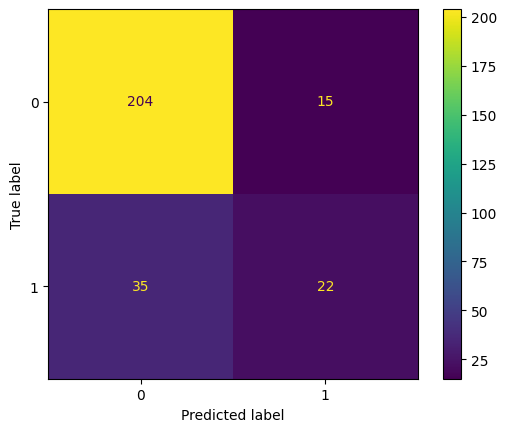

In [86]:
cm = confusion_matrix(y_true=y_val_40, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### test dataset

In [87]:
y_pred = rf.predict(X_test_40)

scores = {'balanced_accuracy': balanced_accuracy_score(y_test_40, y_pred),
            'cohen_kappa': cohen_kappa_score(y_test_40, y_pred),
            'macro_f1': f1_score(y_test_40, y_pred,average ='macro')}

probs = rf.predict_proba(X_test_40)
prob_pred = probs[:,1]
from sklearn.metrics import roc_auc_score
# compute ROC AUC score
roc_auc = roc_auc_score(y_test_40, prob_pred)

In [88]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.6823051948051948, 'cohen_kappa': 0.3991469699662342, 'macro_f1': 0.6984413673155395}
ROC AUC Score: 0.7614853896103896


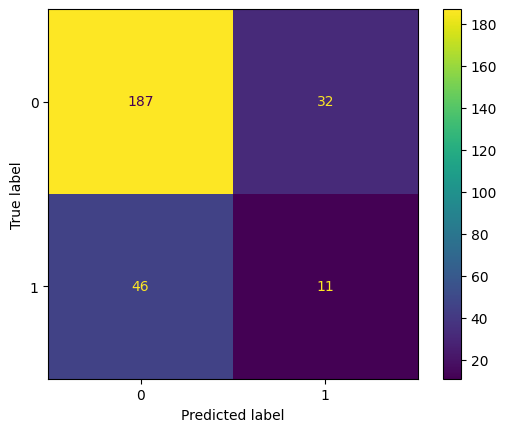

In [89]:
cm = confusion_matrix(y_true=y_val_40, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Second modèle : XGB - card age 40

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, confusion_matrix,f1_score, ConfusionMatrixDisplay

xgb = XGBClassifier()
col = X_train_40.columns
i = 0
variable_list = col[24*i:24*(i+1)] 
variable_list_final = variable_list.union(['do_ALKYL','do_ANTHRA','do_VINCA'])
print(variable_list_final)


classes_weights = list(class_weight.compute_class_weight('balanced',classes=np.unique(y_train_40),y=y_train_40))
weights = np.ones(y_train_40.shape[0], dtype = 'float')
for i, val in enumerate(y_train_40):
    weights[i] = classes_weights[val-1]

#xgb.fit(X_train_balanced.loc[:, variable_list], y_train_balanced, sample_weight=weights)
#xgb.fit(X_train_40.loc[:, variable_list_final],y_train_40, sample_weight=weights)
xgb.fit(X_train_40, y_train_40)

Index(['do_ALKYL', 'do_ANTHRA', 'do_VINCA', 'dv_D01_1320', 'dv_D05_1320',
       'dv_D10_1320', 'dv_D20_1320', 'dv_D30_1320', 'dv_D40_1320',
       'dv_D50_1320', 'dv_D60_1320', 'dv_D70_1320', 'dv_D80_1320',
       'dv_D90_1320', 'dv_D95_1320', 'dv_D99_1320', 'dv_V01_1320',
       'dv_V05_1320', 'dv_V10_1320', 'dv_V15_1320', 'dv_V1_1320',
       'dv_V20_1320', 'dv_V25_1320', 'dv_V2_1320', 'dv_V30_1320',
       'dv_V40_1320', 'dv_V5_1320'],
      dtype='object')


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Validation dataset

In [43]:
y_pred = xgb.predict(X_val_40)

scores = {'balanced_accuracy': balanced_accuracy_score(y_val_40, y_pred),
            'cohen_kappa': cohen_kappa_score(y_val_40, y_pred),
            'macro_f1': f1_score(y_val_40, y_pred,average ='macro')}

probs = xgb.predict_proba(X_val_40)
prob_pred = probs[:,1]
from sklearn.metrics import roc_auc_score
# compute ROC AUC score
roc_auc = roc_auc_score(y_val_40, prob_pred)

In [44]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.6900985340062484, 'cohen_kappa': 0.3682495344506518, 'macro_f1': 0.6839715100820929}
ROC AUC Score: 0.7131298566049827


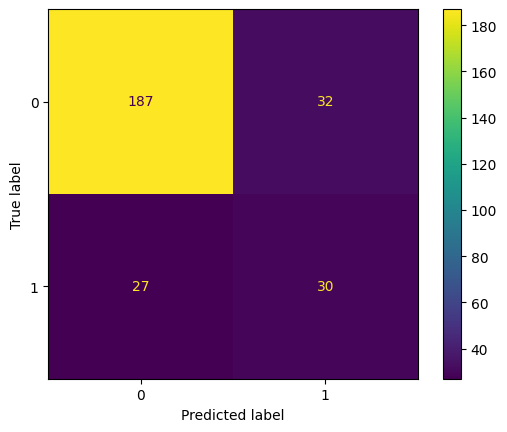

In [45]:
cm = confusion_matrix(y_true=y_val_40, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Test dataset

In [46]:
y_pred = xgb.predict(X_test_40)

scores = {'balanced_accuracy': balanced_accuracy_score(y_test_40, y_pred),
            'cohen_kappa': cohen_kappa_score(y_test_40, y_pred),
            'macro_f1': f1_score(y_test_40, y_pred,average ='macro')}

probs = xgb.predict_proba(X_test_40)
prob_pred = probs[:,1]
from sklearn.metrics import roc_auc_score
# compute ROC AUC score
roc_auc = roc_auc_score(y_test_40, prob_pred)

In [47]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.6373376623376623, 'cohen_kappa': 0.2901234567901234, 'macro_f1': 0.6445741758241759}
ROC AUC Score: 0.7502435064935066


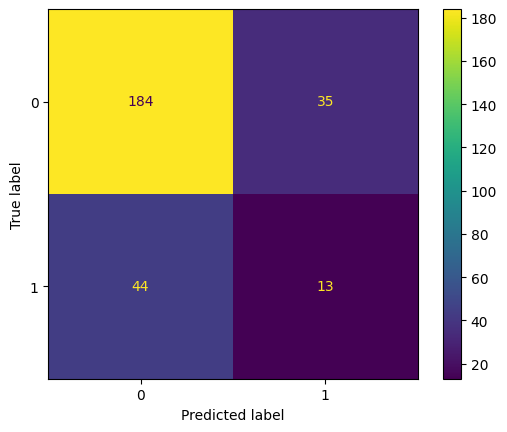

In [48]:
cm = confusion_matrix(y_true=y_val_40, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**texte en gras**# Bootstrap models
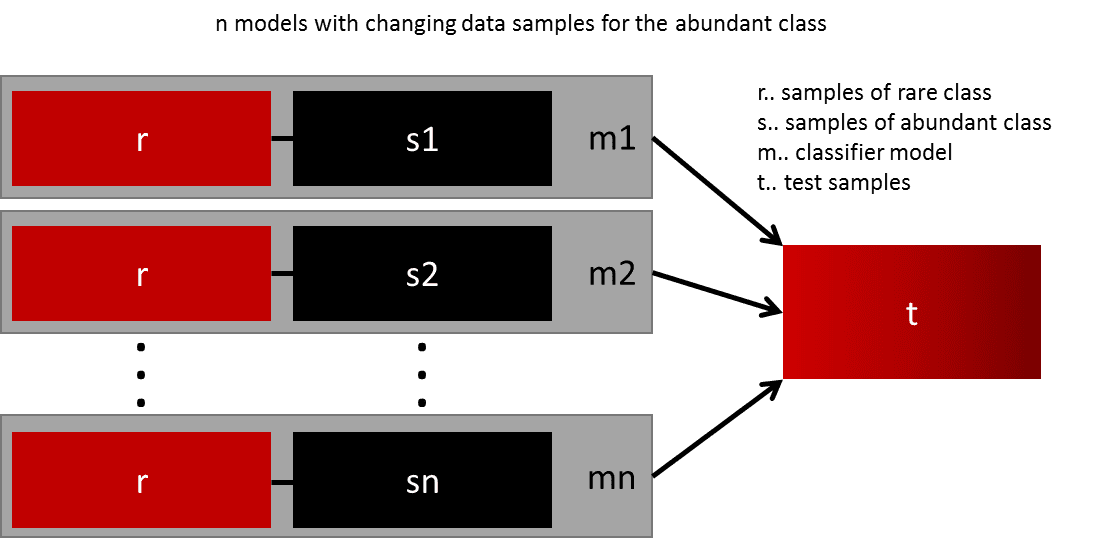

# LGBM - card age 40

In [91]:
import lightgbm as lgb
from lightgbm import plot_importance
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

In [100]:
n = 6
col = X_train_40.columns

predictions = np.zeros((n, len(y_val_40)))
lgbm = lgb.LGBMClassifier()

col = X_train_40.columns
i = 0
variable_list = col[24*i:24*(i+1)] 
variable_list_final = variable_list.union(['do_ALKYL','do_ANTHRA','do_VINCA'])
print(variable_list_final)


classes_weights = list(class_weight.compute_class_weight('balanced',classes=np.unique(y_train_40),y=y_train_40))
weights = np.ones(y_train_40.shape[0], dtype = 'float')
for i, val in enumerate(y_train_40):
    weights[i] = classes_weights[val-1]

lgbm.fit(X_train_40, y_train_40)

Index(['do_ALKYL', 'do_ANTHRA', 'do_VINCA', 'dv_D01_1320', 'dv_D05_1320',
       'dv_D10_1320', 'dv_D20_1320', 'dv_D30_1320', 'dv_D40_1320',
       'dv_D50_1320', 'dv_D60_1320', 'dv_D70_1320', 'dv_D80_1320',
       'dv_D90_1320', 'dv_D95_1320', 'dv_D99_1320', 'dv_V01_1320',
       'dv_V05_1320', 'dv_V10_1320', 'dv_V15_1320', 'dv_V1_1320',
       'dv_V20_1320', 'dv_V25_1320', 'dv_V2_1320', 'dv_V30_1320',
       'dv_V40_1320', 'dv_V5_1320'],
      dtype='object')


LGBMClassifier()

#### validation dataset

In [105]:
y_pred = lgbm.predict(X_val_40)
#predictions[i, :] = y_pred

scores = {'balanced_accuracy': balanced_accuracy_score(y_val_40, y_pred),
          'cohen_kappa': cohen_kappa_score(y_val_40, y_pred),
          'macro_f1': f1_score(y_val_40, y_pred,average ='macro')}

from sklearn.metrics import roc_auc_score
# compute ROC AUC score
probs = lgbm.predict_proba(X_val_40)
prob_pred = probs[:,1]
roc_auc = roc_auc_score(y_val_40, prob_pred)

In [106]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.6839701994712809, 'cohen_kappa': 0.3727781835889944, 'macro_f1': 0.6863636363636363}
ROC AUC Score: 0.7221821677481375


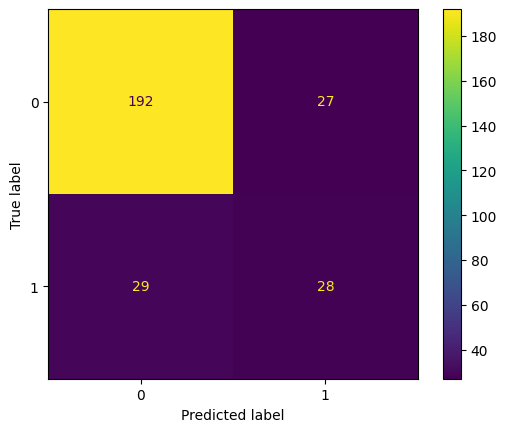

In [107]:
cm = confusion_matrix(y_true=y_val_40, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### test dataset

In [113]:
y_pred = lgbm.predict(X_test_40)

scores = {'balanced_accuracy': balanced_accuracy_score(y_test_40, y_pred),
          'cohen_kappa': cohen_kappa_score(y_test_40, y_pred),
          'macro_f1': f1_score(y_test_40, y_pred,average ='macro')}

from sklearn.metrics import roc_auc_score
# compute ROC AUC score
probs = lgbm.predict_proba(X_test_40)
prob_pred = probs[:,1]
roc_auc = roc_auc_score(y_test_40, prob_pred)

In [114]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.6261363636363637, 'cohen_kappa': 0.2664609053497943, 'macro_f1': 0.6327266483516483}
ROC AUC Score: 0.7332792207792208


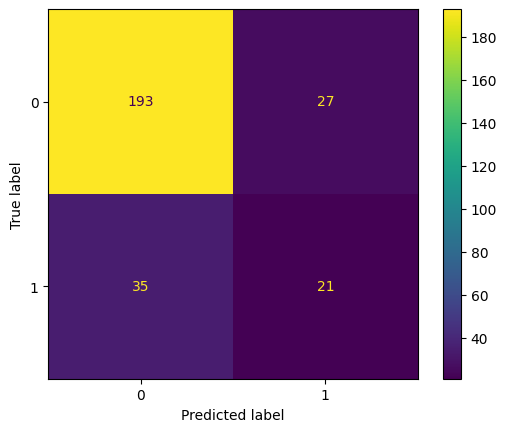

In [115]:
cm = confusion_matrix(y_true=y_test_40, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# RF - card age 50

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
col = X_train_50.columns
i = 0
variable_list = col[24*i:24*(i+1)] 
variable_list_final = variable_list.union(['do_ALKYL','do_ANTHRA','do_VINCA'])
print(variable_list_final)

classes_weights = list(class_weight.compute_class_weight('balanced',classes=np.unique(y_train_50),y=y_train_50))
weights = np.ones(y_train_50.shape[0], dtype = 'float')
for i, val in enumerate(y_train_50):
    weights[i] = classes_weights[val-1]

rf.fit(X_train_50, y_train_50)

Index(['do_ALKYL', 'do_ANTHRA', 'do_VINCA', 'dv_D01_1320', 'dv_D05_1320',
       'dv_D10_1320', 'dv_D20_1320', 'dv_D30_1320', 'dv_D40_1320',
       'dv_D50_1320', 'dv_D60_1320', 'dv_D70_1320', 'dv_D80_1320',
       'dv_D90_1320', 'dv_D95_1320', 'dv_D99_1320', 'dv_V01_1320',
       'dv_V05_1320', 'dv_V10_1320', 'dv_V15_1320', 'dv_V1_1320',
       'dv_V20_1320', 'dv_V25_1320', 'dv_V2_1320', 'dv_V30_1320',
       'dv_V40_1320', 'dv_V5_1320'],
      dtype='object')


RandomForestClassifier()

#### Validation set

In [151]:
y_pred = rf.predict(X_val_50)

scores = {'balanced_accuracy': balanced_accuracy_score(y_val_50, y_pred),
            'cohen_kappa': cohen_kappa_score(y_val_50, y_pred),
            'macro_f1': f1_score(y_val_50, y_pred,average ='macro')}

probs = rf.predict_proba(X_val_50)
prob_pred = probs[:,1]
from sklearn.metrics import roc_auc_score
# compute ROC AUC score
roc_auc = roc_auc_score(y_val_50, prob_pred)

In [152]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.8154761904761905, 'cohen_kappa': 0.6351108448172558, 'macro_f1': 0.8158869322046708}
ROC AUC Score: 0.8833333333333333


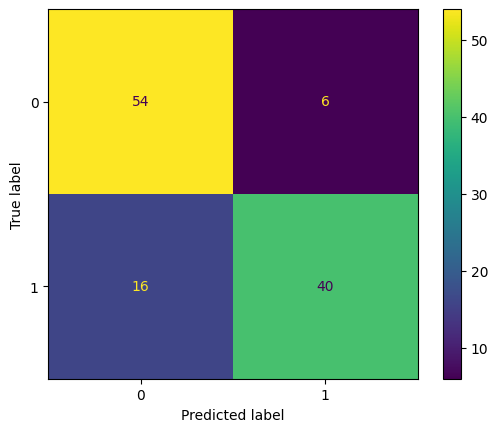

In [130]:
cm = confusion_matrix(y_true=y_val_50, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### test set

In [131]:
y_pred = rf.predict(X_test_50)

scores = {'balanced_accuracy': balanced_accuracy_score(y_test_50, y_pred),
            'cohen_kappa': cohen_kappa_score(y_test_50, y_pred),
            'macro_f1': f1_score(y_test_50, y_pred,average ='macro')}

probs = rf.predict_proba(X_test_50)
prob_pred = probs[:,1]
from sklearn.metrics import roc_auc_score
# compute ROC AUC score
roc_auc = roc_auc_score(y_test_50, prob_pred)

In [132]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.5413321439191198, 'cohen_kappa': 0.08293556085918852, 'macro_f1': 0.5372920900127944}
ROC AUC Score: 0.5474278917633065


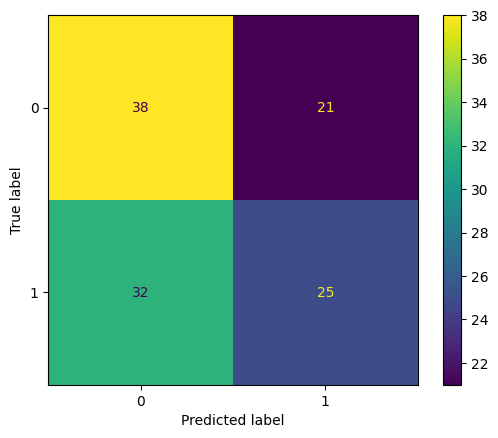

In [133]:
cm = confusion_matrix(y_true=y_test_50, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# XBG - card age 50

In [134]:
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, confusion_matrix,f1_score, ConfusionMatrixDisplay

xgb = XGBClassifier()
col = X_train_50.columns
i = 0
variable_list = col[24*i:24*(i+1)] 
variable_list_final = variable_list.union(['do_ALKYL','do_ANTHRA','do_VINCA'])
print(variable_list_final)


classes_weights = list(class_weight.compute_class_weight('balanced',classes=np.unique(y_train_50),y=y_train_50))
weights = np.ones(y_train_50.shape[0], dtype = 'float')
for i, val in enumerate(y_train_50):
    weights[i] = classes_weights[val-1]

#xgb.fit(X_train_balanced.loc[:, variable_list], y_train_balanced, sample_weight=weights)
#xgb.fit(X_train_40.loc[:, variable_list_final],y_train_40, sample_weight=weights)
xgb.fit(X_train_50, y_train_50)

Index(['do_ALKYL', 'do_ANTHRA', 'do_VINCA', 'dv_D01_1320', 'dv_D05_1320',
       'dv_D10_1320', 'dv_D20_1320', 'dv_D30_1320', 'dv_D40_1320',
       'dv_D50_1320', 'dv_D60_1320', 'dv_D70_1320', 'dv_D80_1320',
       'dv_D90_1320', 'dv_D95_1320', 'dv_D99_1320', 'dv_V01_1320',
       'dv_V05_1320', 'dv_V10_1320', 'dv_V15_1320', 'dv_V1_1320',
       'dv_V20_1320', 'dv_V25_1320', 'dv_V2_1320', 'dv_V30_1320',
       'dv_V40_1320', 'dv_V5_1320'],
      dtype='object')


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### validation set

In [136]:
y_pred = xgb.predict(X_val_50)

scores = {'balanced_accuracy': balanced_accuracy_score(y_val_50, y_pred),
            'cohen_kappa': cohen_kappa_score(y_val_50, y_pred),
            'macro_f1': f1_score(y_val_50, y_pred,average ='macro')}

probs = xgb.predict_proba(X_val_50)
prob_pred = probs[:,1]
from sklearn.metrics import roc_auc_score
# compute ROC AUC score
roc_auc = roc_auc_score(y_val_50, prob_pred)

In [137]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.7898809523809524, 'cohen_kappa': 0.5832335329341318, 'macro_f1': 0.7900452488687784}
ROC AUC Score: 0.8375


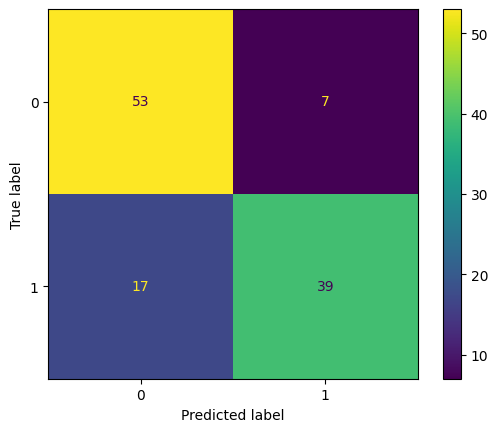

In [138]:
cm = confusion_matrix(y_true=y_val_50, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### test set

In [140]:
y_pred = xgb.predict(X_test_50)

scores = {'balanced_accuracy': balanced_accuracy_score(y_test_50, y_pred),
            'cohen_kappa': cohen_kappa_score(y_test_50, y_pred),
            'macro_f1': f1_score(y_test_50, y_pred,average ='macro')}

probs = xgb.predict_proba(X_test_50)
prob_pred = probs[:,1]
from sklearn.metrics import roc_auc_score
# compute ROC AUC score
roc_auc = roc_auc_score(y_test_50, prob_pred)

In [141]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.5758251561106155, 'cohen_kappa': 0.15214797136038183, 'macro_f1': 0.572213441709942}
ROC AUC Score: 0.5396966993755575


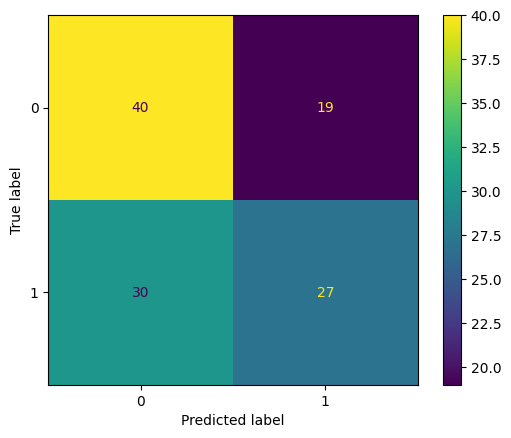

In [142]:
cm = confusion_matrix(y_true=y_test_50, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# LGBM - card age 50

In [143]:
n = 6
col = X_train_50.columns

predictions = np.zeros((n, len(y_val_40)))
lgbm = lgb.LGBMClassifier()
i = 0
variable_list = col[24*i:24*(i+1)] 
variable_list_final = variable_list.union(['do_ALKYL','do_ANTHRA','do_VINCA'])
print(variable_list_final)


classes_weights = list(class_weight.compute_class_weight('balanced',classes=np.unique(y_train_50),y=y_train_50))
weights = np.ones(y_train_50.shape[0], dtype = 'float')
for i, val in enumerate(y_train_50):
    weights[i] = classes_weights[val-1]

lgbm.fit(X_train_50, y_train_50)

Index(['do_ALKYL', 'do_ANTHRA', 'do_VINCA', 'dv_D01_1320', 'dv_D05_1320',
       'dv_D10_1320', 'dv_D20_1320', 'dv_D30_1320', 'dv_D40_1320',
       'dv_D50_1320', 'dv_D60_1320', 'dv_D70_1320', 'dv_D80_1320',
       'dv_D90_1320', 'dv_D95_1320', 'dv_D99_1320', 'dv_V01_1320',
       'dv_V05_1320', 'dv_V10_1320', 'dv_V15_1320', 'dv_V1_1320',
       'dv_V20_1320', 'dv_V25_1320', 'dv_V2_1320', 'dv_V30_1320',
       'dv_V40_1320', 'dv_V5_1320'],
      dtype='object')


LGBMClassifier()

#### Validation set

In [144]:
y_pred = lgbm.predict(X_val_50)

scores = {'balanced_accuracy': balanced_accuracy_score(y_val_50, y_pred),
          'cohen_kappa': cohen_kappa_score(y_val_50, y_pred),
          'macro_f1': f1_score(y_val_50, y_pred,average ='macro')}

from sklearn.metrics import roc_auc_score
# compute ROC AUC score
probs = lgbm.predict_proba(X_val_50)
prob_pred = probs[:,1]
roc_auc = roc_auc_score(y_val_50, prob_pred)

In [145]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.781547619047619, 'cohen_kappa': 0.5661280670257332, 'macro_f1': 0.7817415518928275}
ROC AUC Score: 0.8476190476190476


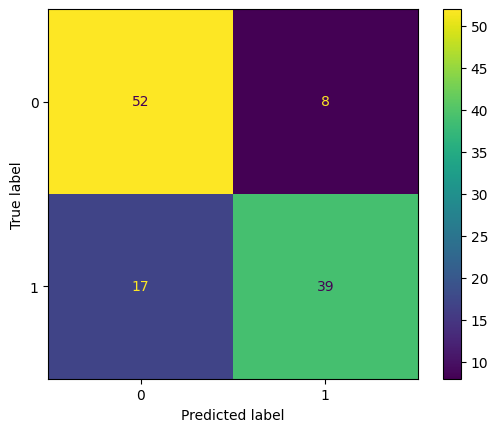

In [146]:
cm = confusion_matrix(y_true=y_val_50, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### test set

In [147]:
y_pred = lgbm.predict(X_test_50)

scores = {'balanced_accuracy': balanced_accuracy_score(y_test_50, y_pred),
          'cohen_kappa': cohen_kappa_score(y_test_50, y_pred),
          'macro_f1': f1_score(y_test_50, y_pred,average ='macro')}

from sklearn.metrics import roc_auc_score
# compute ROC AUC score
probs = lgbm.predict_proba(X_test_50)
prob_pred = probs[:,1]
roc_auc = roc_auc_score(y_test_50, prob_pred)

In [148]:
print(scores)
# print ROC AUC score
print("ROC AUC Score:", roc_auc)

{'balanced_accuracy': 0.567350579839429, 'cohen_kappa': 0.13510289293170297, 'macro_f1': 0.5643028846153846}
ROC AUC Score: 0.5477252453166815


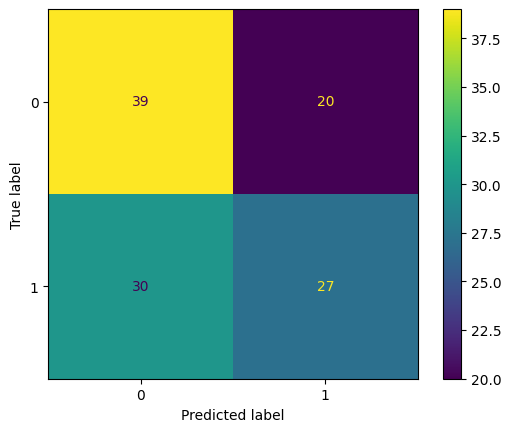

In [149]:
cm = confusion_matrix(y_true=y_test_50, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Annexe

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Définition de l'instance SMOTE
sm = SMOTE(k_neighbors=2, sampling_strategy=0.7)

# Application du SMOTE aux données
X_res, y_res = sm.fit_resample(X_train_40, y_train_40)

In [ ]:
X_res.shape

### Hyper params LGBM



In [ ]:
random_grid = {'reg_lambda' : [0.1, 1, 5],
               'class_weight': [None, 'balanced'],
               'learning_rate':[0.001, 0.01, 0.1],
               'boosting_type' :['gbdt', 'dart', 'goss']               
               }


n = 1
col = X_train_40.columns

predictions = np.zeros((n, len(y_val_40)))

for i in range(n):
  print(len(y_train_40))

  lgba = lgb.LGBMClassifier(objective='binary',n_estimators=10000)
  variable_list = col[24*i:24*(i+1)]

  classes_weights = list(class_weight.compute_class_weight('balanced',classes=np.unique(y_train_40),y=y_train_40))
  weights = np.ones(y_train_40.shape[0], dtype = 'float')
  for j, val in enumerate(y_train_40):
      weights[j] = classes_weights[val-1]

  lgb_random = RandomizedSearchCV(estimator = lgba, scoring= 'f1_macro',
                                param_distributions = random_grid,cv =3,
                                n_iter=12,verbose=6, random_state=0, n_jobs=1)
  lgb_random.fit(X_train_40.loc[:, variable_list], y_train_40, sample_weight=weights)

In [ ]:
lgb_random.best_params_

In [ ]:
n = 6
col = X_train_40.columns

predictions = np.zeros((n, len(y_val_40)))

for i in range(n):
  print(len(y_train_40))

  lgbm_i = lgb.LGBMClassifier(objective='binary',reg_lambda= 5,
  learning_rate= 0.1, class_weight= 'balanced', boosting_type= 'goss')
  variable_list = col[24*i:24*(i+1)]

  classes_weights = list(class_weight.compute_class_weight('balanced',classes=np.unique(y_train_40),y=y_train_40))
  weights = np.ones(y_train_40.shape[0], dtype = 'float')
  for j, val in enumerate(y_train_40):
      weights[j] = classes_weights[val-1]

  lgbm_i.fit(X_train_40.loc[:, variable_list], y_train_40, sample_weight=weights)
  y_pred = lgbm_i.predict(X_val_40.loc[:, variable_list])
  predictions[i, :] = y_pred

  scores = {'balanced_accuracy': balanced_accuracy_score(y_val_40, y_pred),
            'cohen_kappa': cohen_kappa_score(y_val_40, y_pred),
            'macro_f1': f1_score(y_val_40, y_pred,average ='macro')}

  print(scores)
  

## Imbalanced learn

In [ ]:
for i in range(n):
  print(len(y_train_40))
  X_train_i, y_train_i = balanced_dataset_to_ratio(X_train, y_train)

  brf_i = BalancedRandomForestClassifier(n_estimators=100, random_state=0)

  variable_list = col[24*i:24*(i+1)]

  classes_weights = list(class_weight.compute_class_weight('balanced',classes=np.unique(y_train_i),y=y_train_i))
  weights = np.ones(y_train_i.shape[0], dtype = 'float')
  for j, val in enumerate(y_train_i):
      weights[j] = classes_weights[val-1]

  brf_i.fit(X_train_i.loc[:, variable_list], y_train_i, sample_weight=weights)
  y_pred = brf_i.predict(X_val.loc[:, variable_list])
  predictions[i, :] = y_pred

  scores = {'balanced_accuracy': balanced_accuracy_score(y_val, y_pred),
            'cohen_kappa': cohen_kappa_score(y_val, y_pred),
            'macro_f1': f1_score(y_val, y_pred,average ='macro')}

  print(scores)

In [ ]:
y_pred_mean = np.around(predictions.sum(axis=0)/n)

scores = {'balanced_accuracy': balanced_accuracy_score(y_val, y_pred_mean),
          'cohen_kappa': cohen_kappa_score(y_val, y_pred_mean),
          'macro_f1': f1_score(y_val, y_pred_mean,average ='macro')}

print(scores)

In [ ]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## test pred

In [ ]:
y_pred_test = brf.predict(X_test)


scores = {'balanced_accuracy': balanced_accuracy_score(y_test, y_pred_test),
          'cohen_kappa': cohen_kappa_score(y_test, y_pred_test),
          'macro_f1': f1_score(y_test, y_pred_test,average ='macro')}

print(scores)
  

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Clara qui a pas réussi à installer matplotlib sur son VSCODE 

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, confusion_matrix,f1_score, ConfusionMatrixDisplay

y_true = [1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
y_pred = [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()